In [3]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph #framework that helps you design and manage the flow of tasks in your application using a graph sturcture


In [ ]:
# Creating the agent state - this is a shared data structure that hold information and context of the application when it runs

class AgentState(TypedDict): #state schema
    message : str

def greeting_node(state: AgentState) -> AgentState:
    """ A simple node that adds a greeting to the state"""

    state["message"] = "hey " + state["message"] + ", how are you?"

    return state


In [7]:
graph = StateGraph(AgentState)

graph.add_node("Greeter", greeting_node)

graph.set_entry_point("Greeter")
graph.set_finish_point("Greeter")

app = graph.compile()

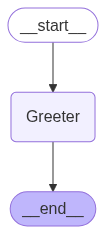

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
result = app.invoke({"message":"Ruveen"})

In [14]:
result["message"]

'hey Ruveen, how are you?'

In [17]:
result = app.invoke({"message":""})

In [18]:
result["message"]

'hey , how are you?'